## Partie 1 et 2 :

In [6]:
import json
import pandas as pd

#1
with open('evg_esp_veg.envpdiprboucle.json', 'r') as file:
    d_json = json.load(file)

#2
print(type(d_json))

print(d_json.keys())


#3

fields = d_json.get('fields', [])
values = d_json.get('values', [])


var = fields
rando = values


print(f"Nombre de champs: {len(var)}")
print(f"Nombre de valeurs: {len(rando)}")

# 4
print(f"taille du  dataset: {len(rando)} lignes")

if len(rando) >= 10:
     print(f"nom de la randonnée à la ligne 10: {rando[9].get('nom', 'No name field')}")
else:
     print("le dataset possède moins de 10 lignes")


df_rando = pd.DataFrame.from_dict(rando)
print (df_rando.shape)
print (df_rando.head())

print(df_rando.loc[:,"cheminement_aller"]) #affiche la colonne "cheminement_aller"
print(df_rando.iloc[10:13,0:3]) # affiche les lignes 10 a 13 et colonnes 0 à 3

print (df_rando["difficulte"].value_counts())

tps = df_rando["temps_parcours"]
print(type(tps[0]))

# t = tps[0]

# #1ere solution
# print(t[0:-3])

# #2eme solution
# print(t.replace("min",""))

#tps_clean = []


# for t in tps_clean:
#     tps_clean.append(t.replace("min",""))

# Nettoyer les valeurs de "temps_parcours" en supprimant "min" et en convertissant en entier
tps_clean = [int(t.replace(" min", "")) for t in df_rando["temps_parcours"]]

# Assigner les valeurs nettoyées à la colonne "temps_parcours"
df_rando["temps_parcours"] = tps_clean

# Calculer et afficher la moyenne des temps de parcours
print(f"Temps de parcours moyen: {df_rando['temps_parcours'].mean():.2f}")


plot.bar(df_rando["difficulte"].value_counts())




ValueError: Length of values (0) does not match length of index (61)

## Partie 3 : matplotlib


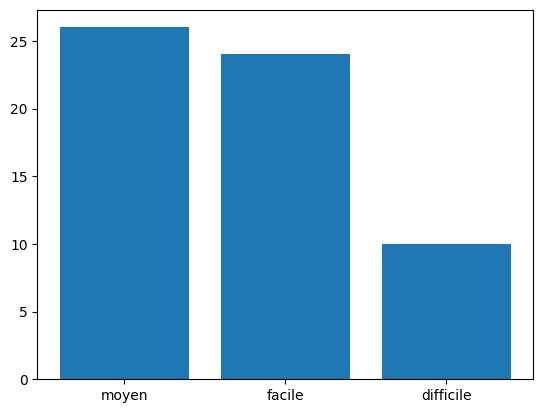

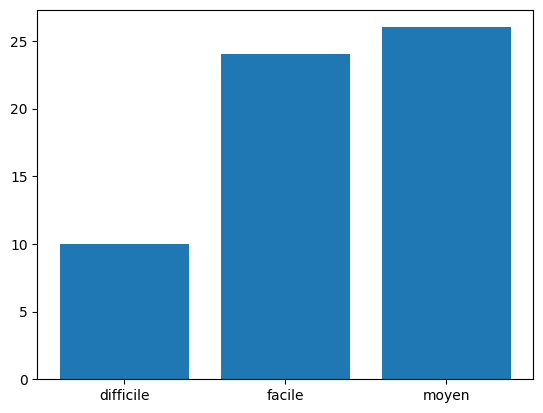

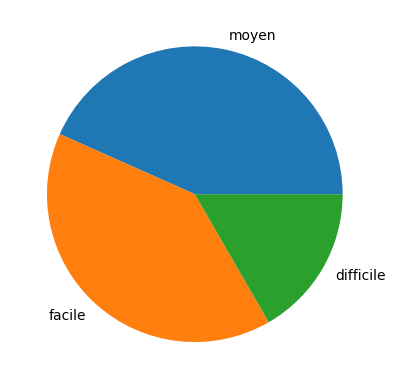

In [25]:
#####
import matplotlib.pyplot as plt
import json
import pandas as pd

with open('evg_esp_veg.envpdiprboucle.json', 'r') as file:
    d_json = json.load(file)

fields = d_json.get('fields', [])
values = d_json.get('values', [])

var = fields
rando = values

df_rando = pd.DataFrame.from_dict(rando)
######

nb_difficulte = df_rando ["difficulte"].value_counts()
plt.bar(nb_difficulte.index,nb_difficulte.values) #affiche le nombre de randonnées par difficulté
plt.show()

nb_difficulte_sort = nb_difficulte.sort_index()
plt.bar(nb_difficulte_sort.index, nb_difficulte.sort_index().values) # affiche le nombre de randonnées par difficulté avec un tri sur l'index
plt.show()

plt.pie(nb_difficulte.values, labels = nb_difficulte.index) #affiche un camembert du nombre de randonnées par difficulté
plt.show()



## Partie 4 : diagramme de dispersion matplotlib

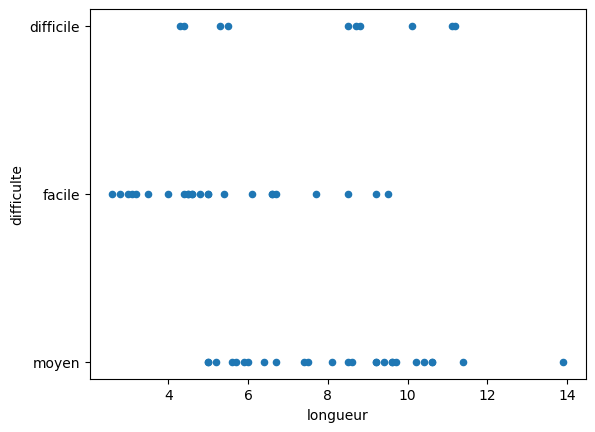

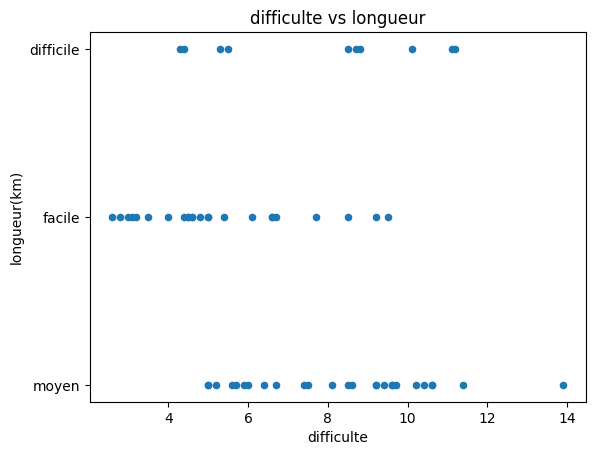

Coefficient de corrélation entre longueur et difficulte: 0.22


In [30]:
#region importation des données/librairies
import matplotlib.pyplot as plt
import json
import pandas as pd

with open('evg_esp_veg.envpdiprboucle.json', 'r') as file:
    d_json = json.load(file)

fields = d_json.get('fields', [])
values = d_json.get('values', [])

var = fields
rando = values

df_rando = pd.DataFrame.from_dict(rando)

#endregion


longueur_clean = [float(l.replace("km", "").replace(",", ".")) for l in df_rando["longueur"]]

df_rando["longueur"] = longueur_clean
# print(df_rando.head())

# Supprimer les lignes avec des valeurs manquantes dans les colonnes "difficulte" et "longueur"
df_rando = df_rando.dropna(subset=["difficulte", "longueur"])

nom_var_1 = "longueur"
nom_var_2 = "difficulte"

#df_rando.plot.scatter(x = nom_var_1, y = nom_var_2)
ax = df_rando.plot.scatter(x = nom_var_1, y = nom_var_2)
ax.set_title("difficulte vs longueur")
ax.set_xlabel("difficulte")
ax.set_ylabel("longueur(km)")
plt.show()

correlation = df_rando[nom_var_1].corr(df_rando[nom_var_2].astype('category').cat.codes)
print(f"Coefficient de corrélation entre {nom_var_1} et {nom_var_2}: {correlation:.2f}")


## partie 5 : analyse sur plusieurs tables

In [31]:
#region importation des données/librairies
import matplotlib.pyplot as plt
import pandas as pd

#5.1

# Lire chaque fichier CSV
df_lieux = pd.read_csv("lieux-2018.csv", sep=',',encoding = 'utf-8', low_memory=False)
df_caracteristiques = pd.read_csv("caracteristiques-2018.csv", sep=',',encoding = 'utf-8',quotechar='"', low_memory=False)
df_vehicules = pd.read_csv("vehicules-2018.csv", sep=',',encoding = 'utf-8', low_memory=False)
df_usagers = pd.read_csv("usagers-2018.csv", sep=',',encoding = 'utf-8', low_memory=False)

# nettoyage de la dernière colonne de caracteristiques pour enlever les ; en fin de ligne
df_caracteristiques.rename(columns={'dep;': 'dep'}, inplace=True)
df_caracteristiques['dep'] = df_caracteristiques['dep'].str.replace(';', '').str.strip()
        


#endregion


# print("Colonnes du DataFrame lieux")
# print(df_lieux.columns)
# print("\nColonnes du DataFrame caracteristiques")
# print(df_caracteristiques.columns)
# print("\nColonnes du DataFrame vehicules")
# print(df_vehicules.columns)
# print("\nColonnes du DataFrame usagers")
# print(df_usagers.columns)

#5.2

df_accidents_lyon = df_caracteristiques[df_caracteristiques["dep"] == "690"]

print("DataFrame des accidents à Lyon")
print(df_accidents_lyon.head())

nombre_accidents_lyon = df_accidents_lyon.shape[0]
print(f"Nombre d'accidents à Lyon (code département 690) : {nombre_accidents_lyon}")

#5.3

df_accidents_velo = df_vehicules[df_vehicules["catv"] == 1]

print("DataFrame des accidents impliquant une bicyclette")
print(df_accidents_velo.head())

nombre_accidents_velo = df_accidents_velo.shape[0]
print(f"Nombre d'accidents à velo (code vehicule 01) : {nombre_accidents_velo}")

#5.4

df_accidents_lyon.loc[:, 'Num_Acc'] = df_accidents_lyon['Num_Acc'].astype(str)
df_accidents_velo.loc[:, 'Num_Acc'] = df_accidents_velo['Num_Acc'].astype(str)

df_accidents_lyon_velo = df_accidents_lyon.join(df_accidents_velo.set_index('Num_Acc'), on='Num_Acc', how='inner')


nombre_accidents_lyon_velo = df_accidents_lyon_velo.shape[0]
print(f"Nombre d'accidents impliquant un vélo à Lyon : {nombre_accidents_lyon_velo}")
print(df_accidents_lyon_velo.head())



DataFrame des accidents à Lyon
           Num_Acc  an mois  jour  hrmn lum  agg  int  atm  col   com  \
1653  201800001654  18    2  16.0  1755   5  2.0  9.0  2.0  6.0  89.0   
1655  201800001656  18    5   5.0  1330   1  2.0  1.0  1.0  3.0  89.0   
1656  201800001657  18    5   6.0  1541   1  1.0  1.0  1.0  6.0  89.0   
1657  201800001658  18    5  29.0  1355   1  2.0  1.0  1.0  1.0  89.0   
1658  201800001659  18    7   3.0   830   1  2.0  1.0  1.0  6.0  89.0   

                           adr gps        lat      long  dep  
1653         allée de l'Aubier   M  4573769.0  477198.0  690  
1655  intersection avenue du C   M  4573682.0  477469.0  690  
1656          avenue du chater   M  4573443.0  477306.0  690  
1657        2 Avenue du chater   M  4575047.0  477202.0  690  
1658       15 Avenue du chater   M  4574656.0  477229.0  690  
Nombre d'accidents à Lyon (code département 690) : 2167
DataFrame des accidents impliquant une bicyclette
         Num_Acc  senc  catv  occutc   obs  ob

C:\Users\lknoe\AppData\Local\Temp\ipykernel_7176\56128358.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['201800000004' '201800000020' '201800000044' ... '201800057676'
 '201800057718' '201800057777']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_accidents_velo_copy.loc[:, 'Num_Acc'] = df_accidents_velo['Num_Acc'].astype(str)
